In [1]:
import numpy as np
import seaborn as sns
import pandas as pd # data preprocessing
import itertools # confusion matrix
from sklearn.metrics import confusion_matrix
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("drugsCom_raw (1).tsv",sep='\t')

In [3]:
df

Unnamed: 0                  drugName                     condition  \
0           206461                 Valsartan  Left Ventricular Dysfunction   
1            95260                Guanfacine                          ADHD   
2            92703                    Lybrel                 Birth Control   
3           138000                Ortho Evra                 Birth Control   
4            35696  Buprenorphine / naloxone             Opiate Dependence   
...            ...                       ...                           ...   
161292      191035                   Campral            Alcohol Dependence   
161293      127085            Metoclopramide               Nausea/Vomiting   
161294      187382                   Orencia          Rheumatoid Arthritis   
161295       47128        Thyroid desiccated           Underactive Thyroid   
161296      215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   
2       "I used to take another oral contraceptive, wh...     5.0   
3       "This is my first time using any form of birth...     8.0   
4       "Suboxone has completely turned my life around...     9.0   
...                                                   ...     ...   
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
0             May 20, 2012           27  
1           April 27, 2010          192  
2        December 14, 2009           17  
3         November 3, 2015           10  
4        November 27, 2016           37  
...                    ...          ...  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116  

[161297 rows x 7 columns]

In [4]:
df.shape

(161297, 7)

In [5]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [6]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [8]:
df.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [9]:
df.describe()

Unnamed: 0         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [10]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [11]:
df['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [12]:
len(df['condition'].unique().tolist())

885

In [ ]:
# How many drugs do we have?
df['drugName'].unique().tolist()

In [ ]:
len(df['drugName'].unique().tolist())

In [17]:
# Most popular drugs
df['drugName'].value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64

In [18]:
# Top 20 most popular drug
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Medroxyprogesterone                    995
Citalopram                             995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

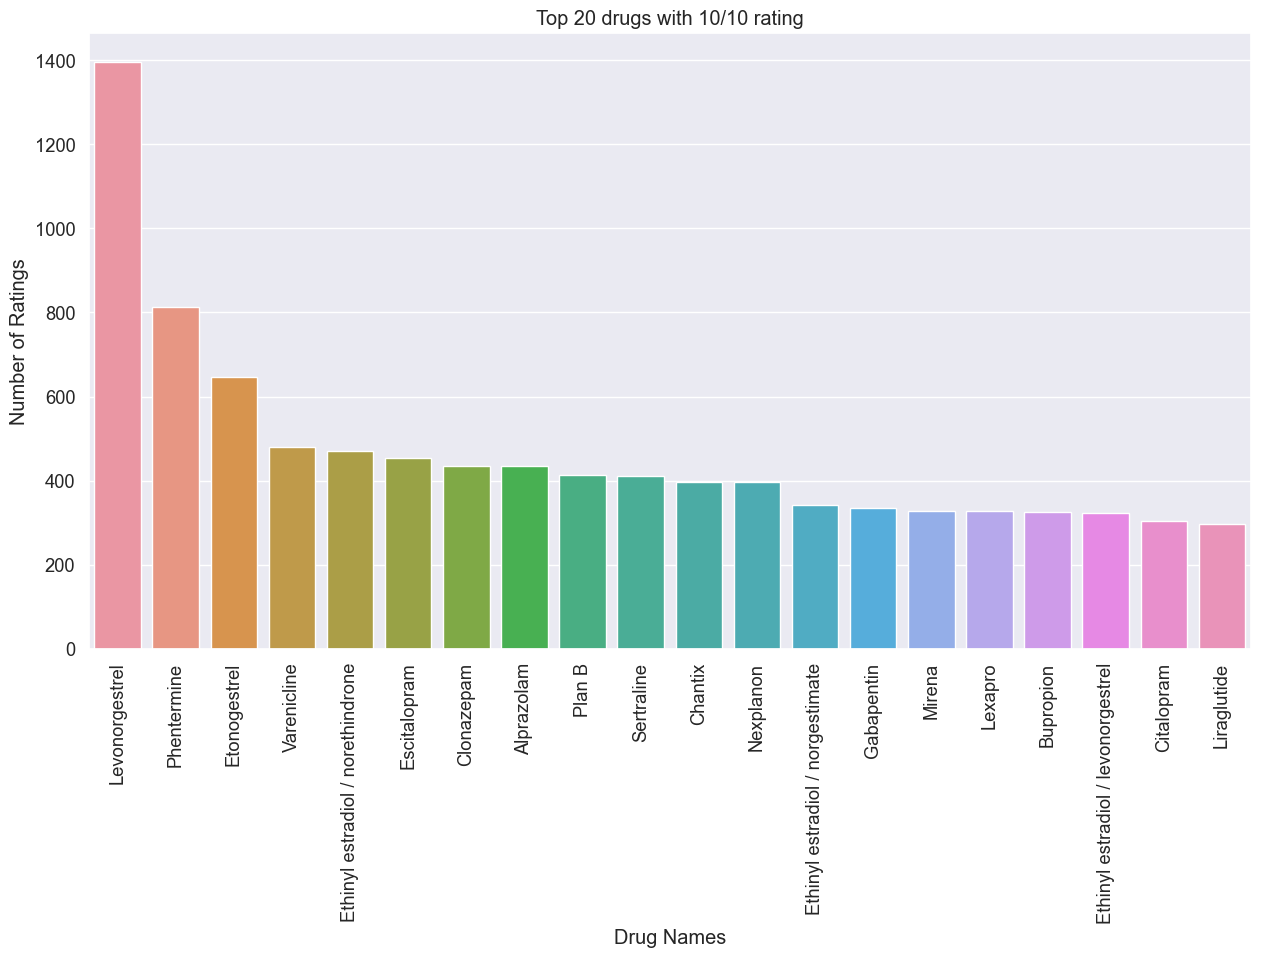

In [19]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10,"drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

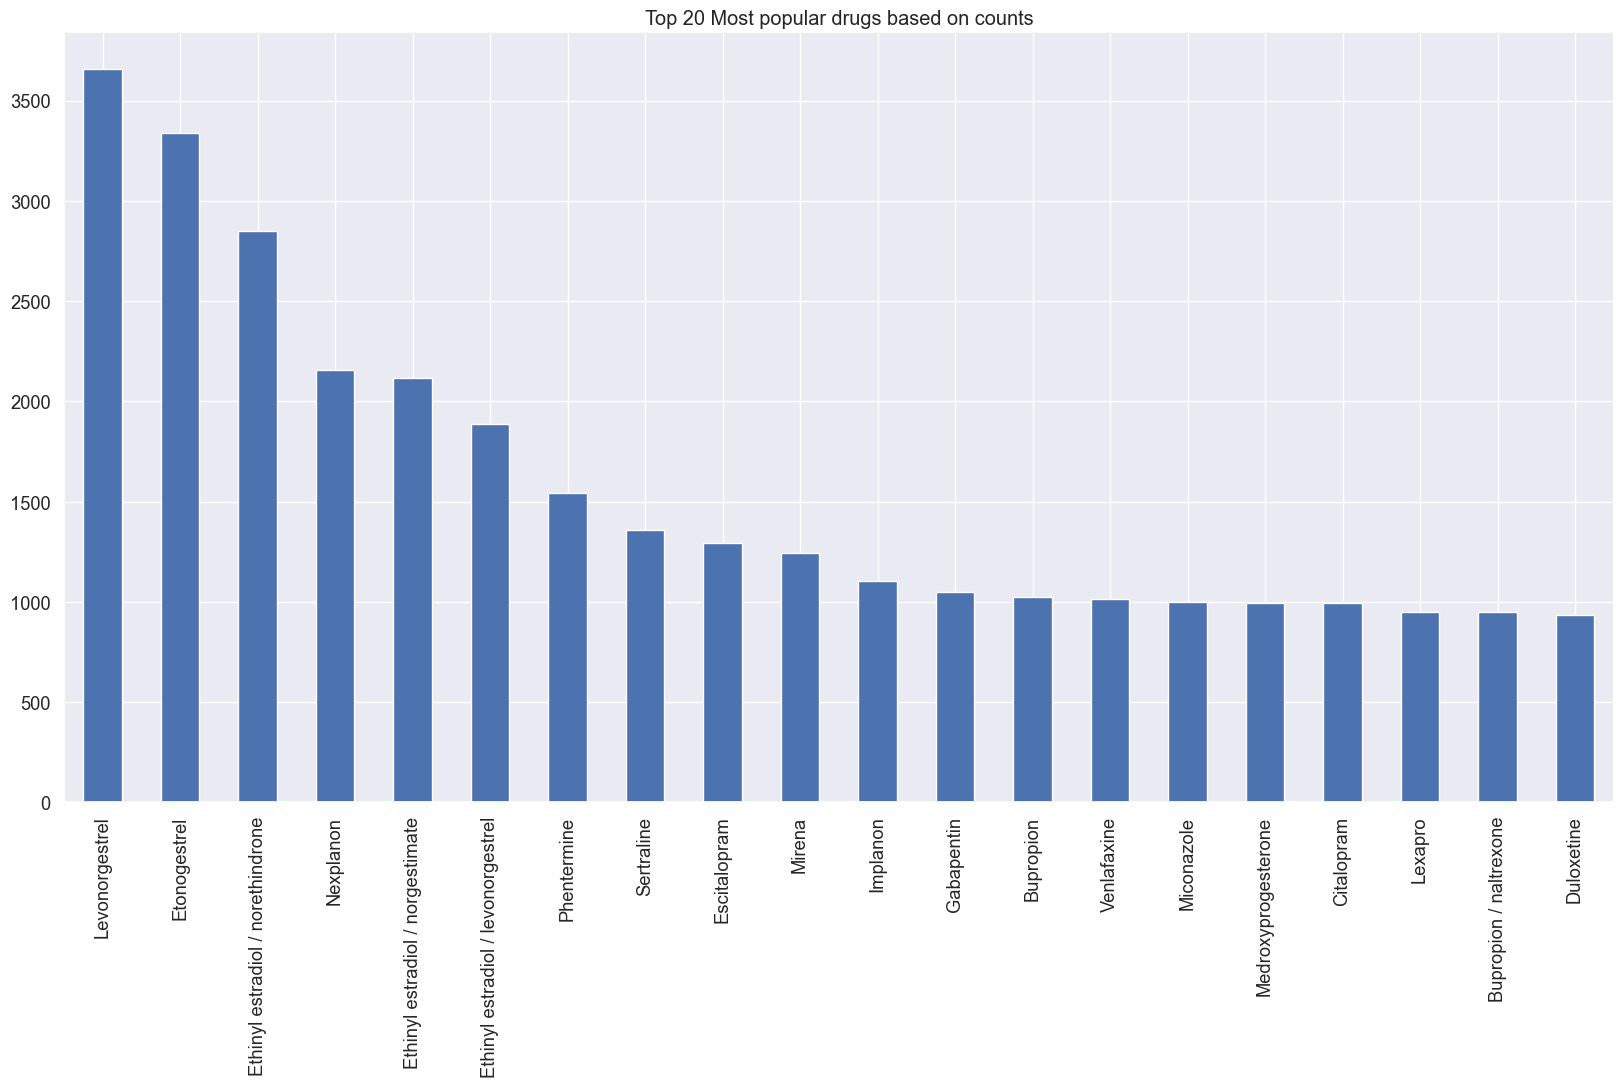

In [20]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

In [21]:
# Least 20 Drugs (Most Popular)
df['drugName'].value_counts().nsmallest(20)

Clemastine                         1
Topicort LP                        1
Smoothie Readi-Cat 2               1
Ipratropium Inhalation Solution    1
Olux-E                             1
Hexachlorophene                    1
Pedi-Dri                           1
Ginseng                            1
Lincocin                           1
EnLyte                             1
Tums Smoothies                     1
Purinethol                         1
Aldomet                            1
Midol Extended Relief              1
Travel-Eze                         1
Ponatinib                          1
Wal-finate                         1
Ciclodan                           1
Niacinamide                        1
Fragmin                            1
Name: drugName, dtype: int64

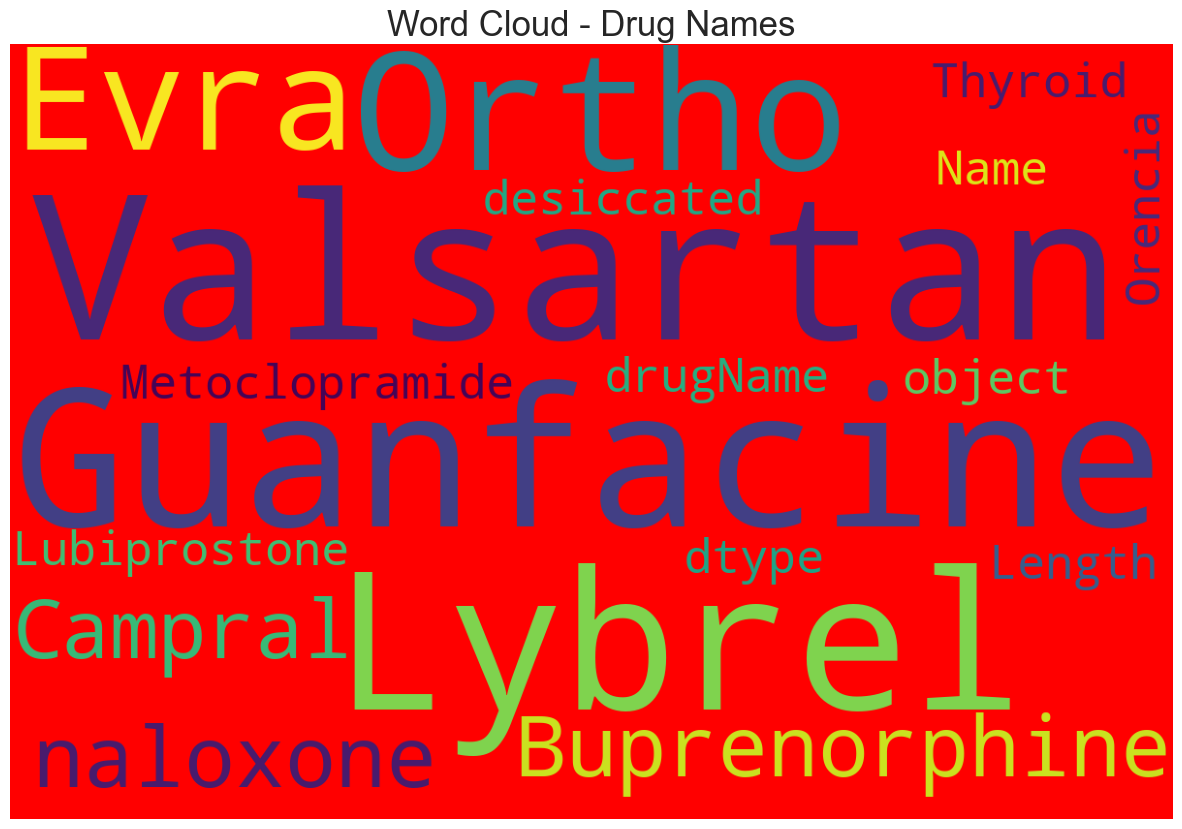

In [22]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'red', stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

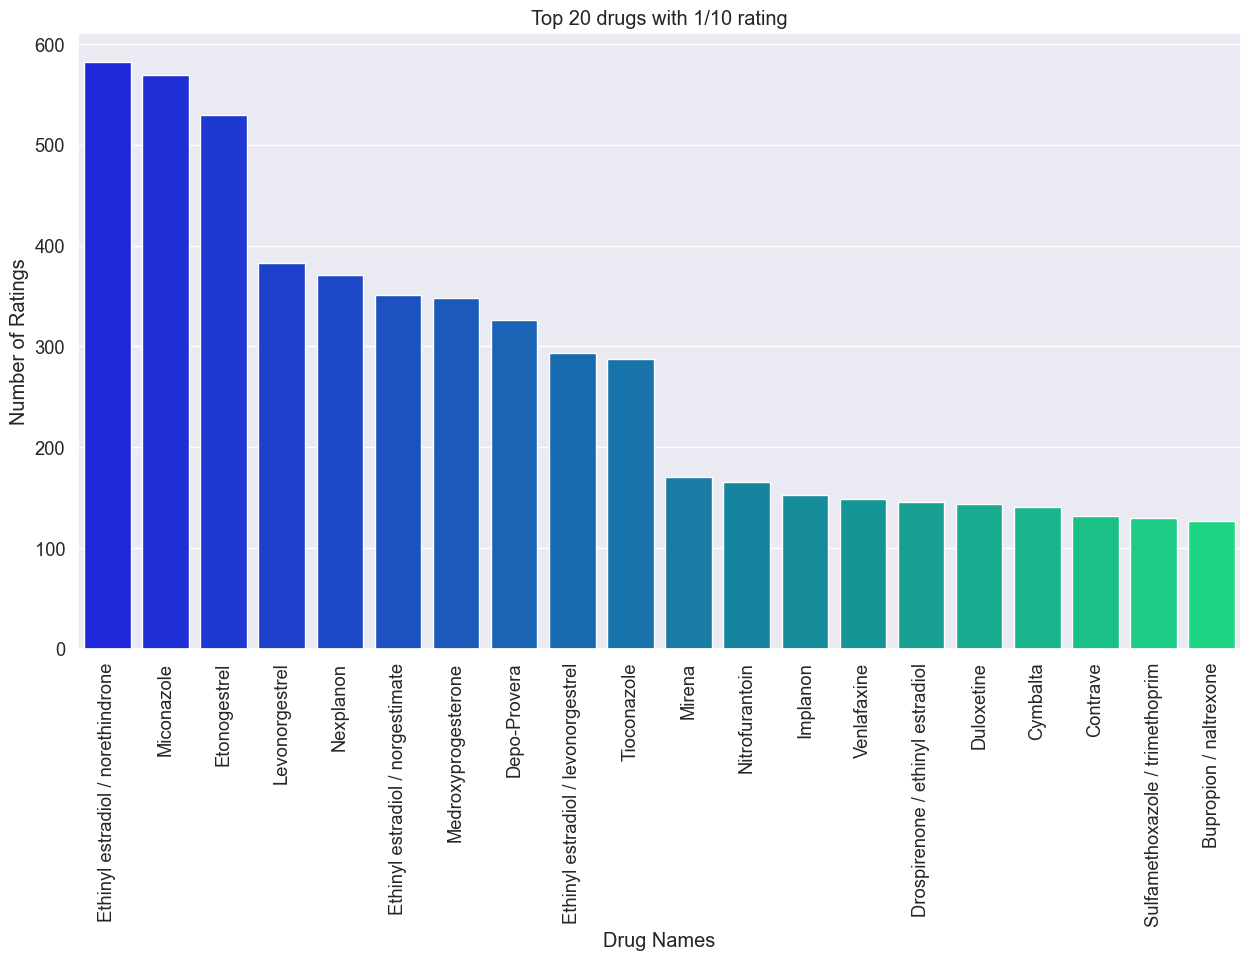

In [23]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

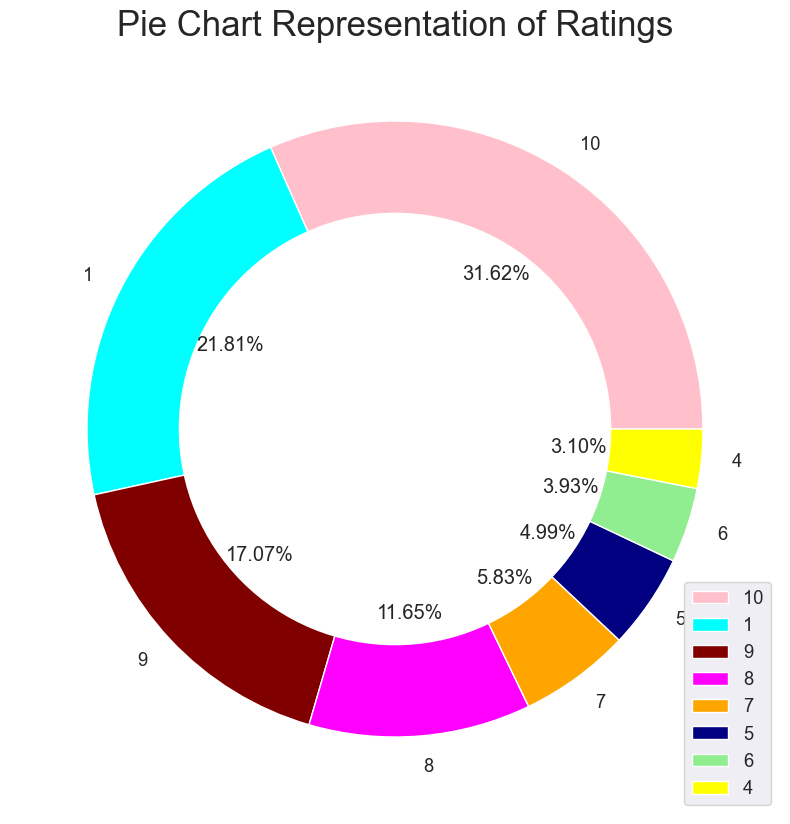

In [24]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

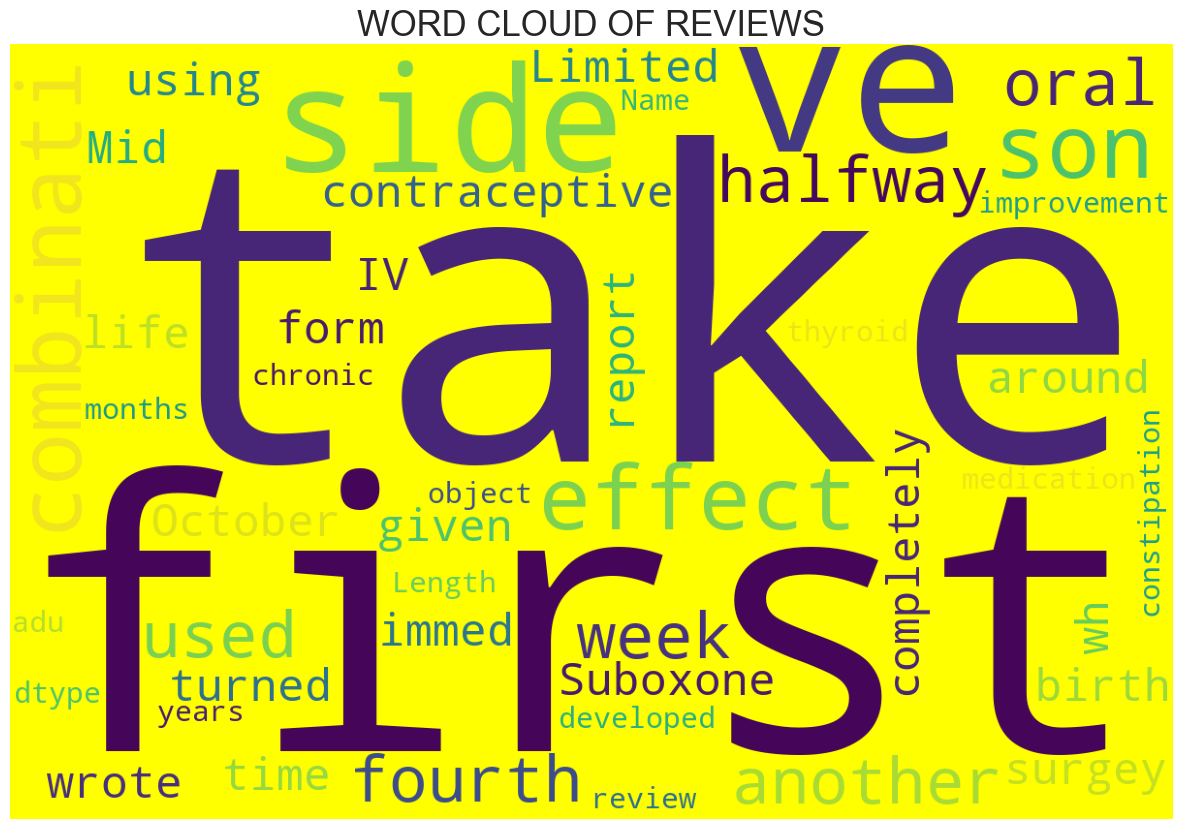

In [25]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(df['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)

plt.axis('off')
plt.imshow(wordcloud)


In [26]:
df_train = df[(df['condition']=='Depression') | (df['condition']=='High Blood Pressure') | (df['condition']=='Diabetes, Type 2')]

In [27]:
df.shape

(161297, 7)

In [28]:
df_train.shape

(13944, 7)

In [29]:
X = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

In [30]:
X

condition                                             review
11               Depression  "I have taken anti-depressants for years, with...
31               Depression  "1 week on Zoloft for anxiety and mood swings....
44               Depression  "my gp started me on Venlafaxine yesterday to ...
50         Diabetes, Type 2  "Hey Guys,  It&#039;s been 4 months since my l...
67               Depression  "This medicine saved my life. I was at my wits...
...                     ...                                                ...
161251  High Blood Pressure  "It is fourth blood pressure pill for me. It f...
161258  High Blood Pressure  "While on Bystolic my feet and arms were numb....
161278     Diabetes, Type 2  "I just got diagnosed with type 2. My doctor p...
161286           Depression  "This is the third med I&#039;ve tried for anx...
161290  High Blood Pressure  "I have only been on Tekturna for 9 days. The ...

[13944 rows x 2 columns]

In [31]:
X.condition.value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [32]:
# segregating dataframe for analyzing individual condition
X_depression = X[(X['condition']=='Depression')]
X_diabetes = X[(X['condition']=='Diabetes, Type 2')]
X_bp = X[(X['condition']=='High Blood Pressure')]

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Word cloud for depression')

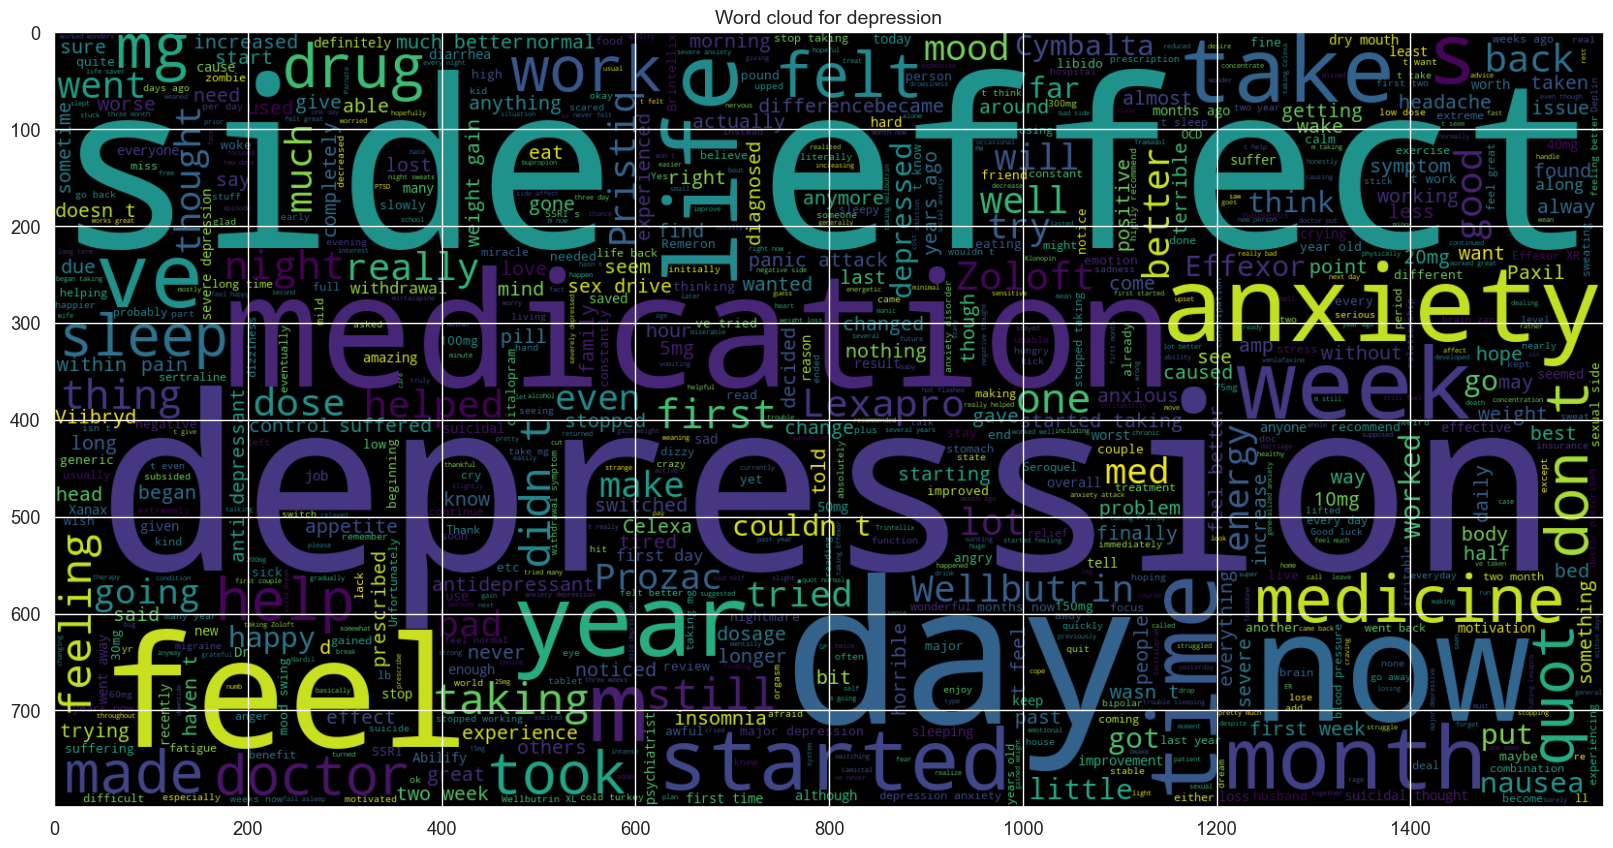

In [34]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 800, width = 1600, height = 800).generate(" ".join(X_depression.review))
plt.imshow(wc,interpolation = 'bilinear')
plt.title('Word cloud for depression',fontsize = 14)

Text(0.5, 1.0, 'Word cloud for diabetes')

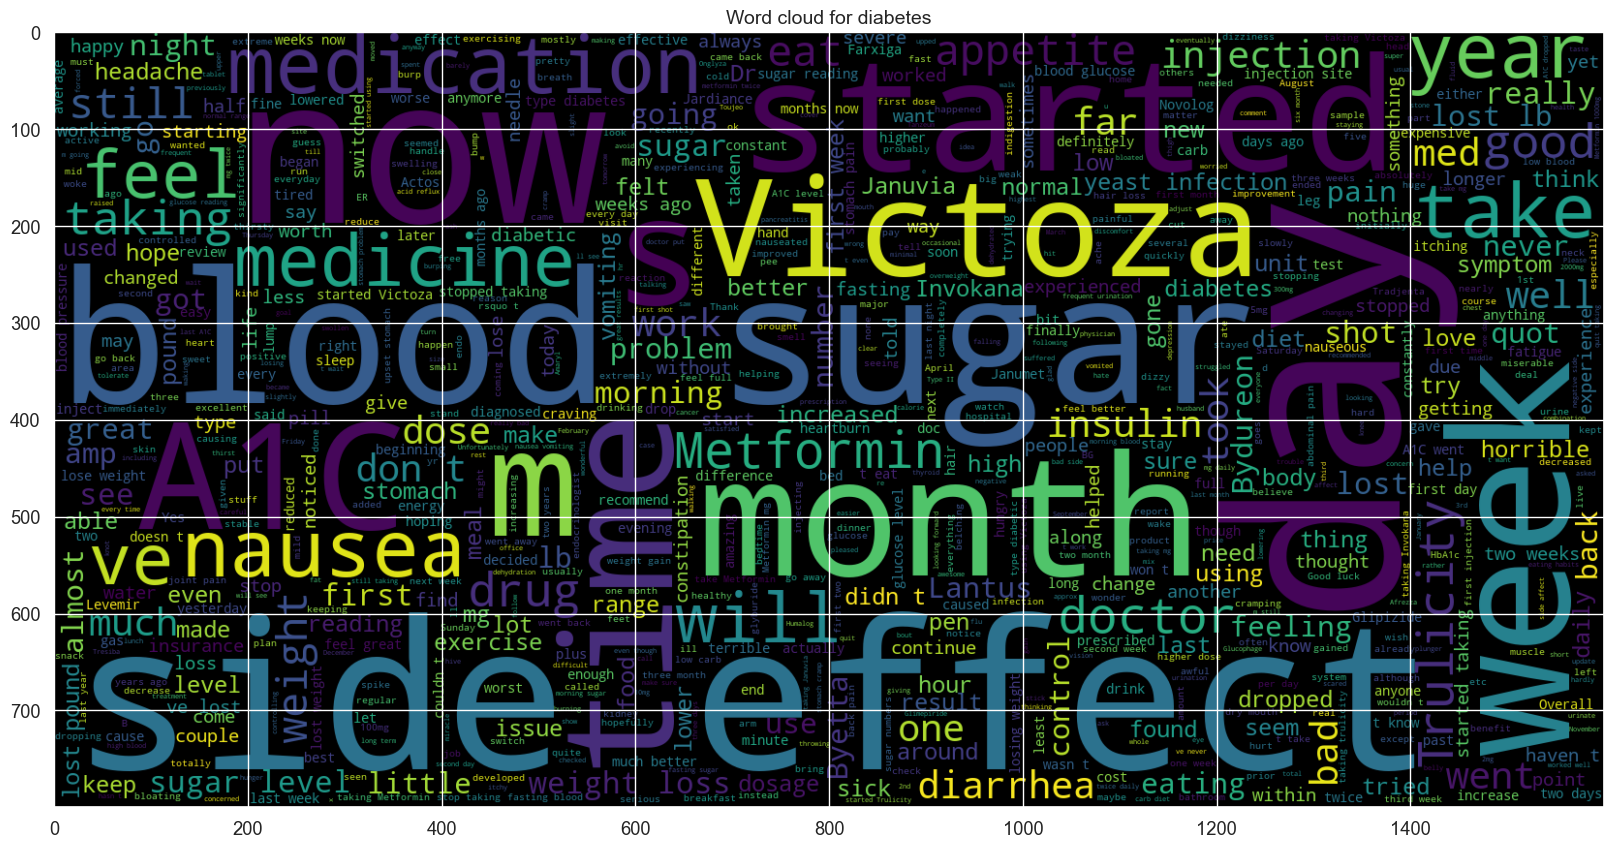

In [35]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 800, width = 1600, height = 800).generate(" ".join(X_diabetes.review))
plt.imshow(wc,interpolation = 'bilinear')
plt.title('Word cloud for diabetes',fontsize = 14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

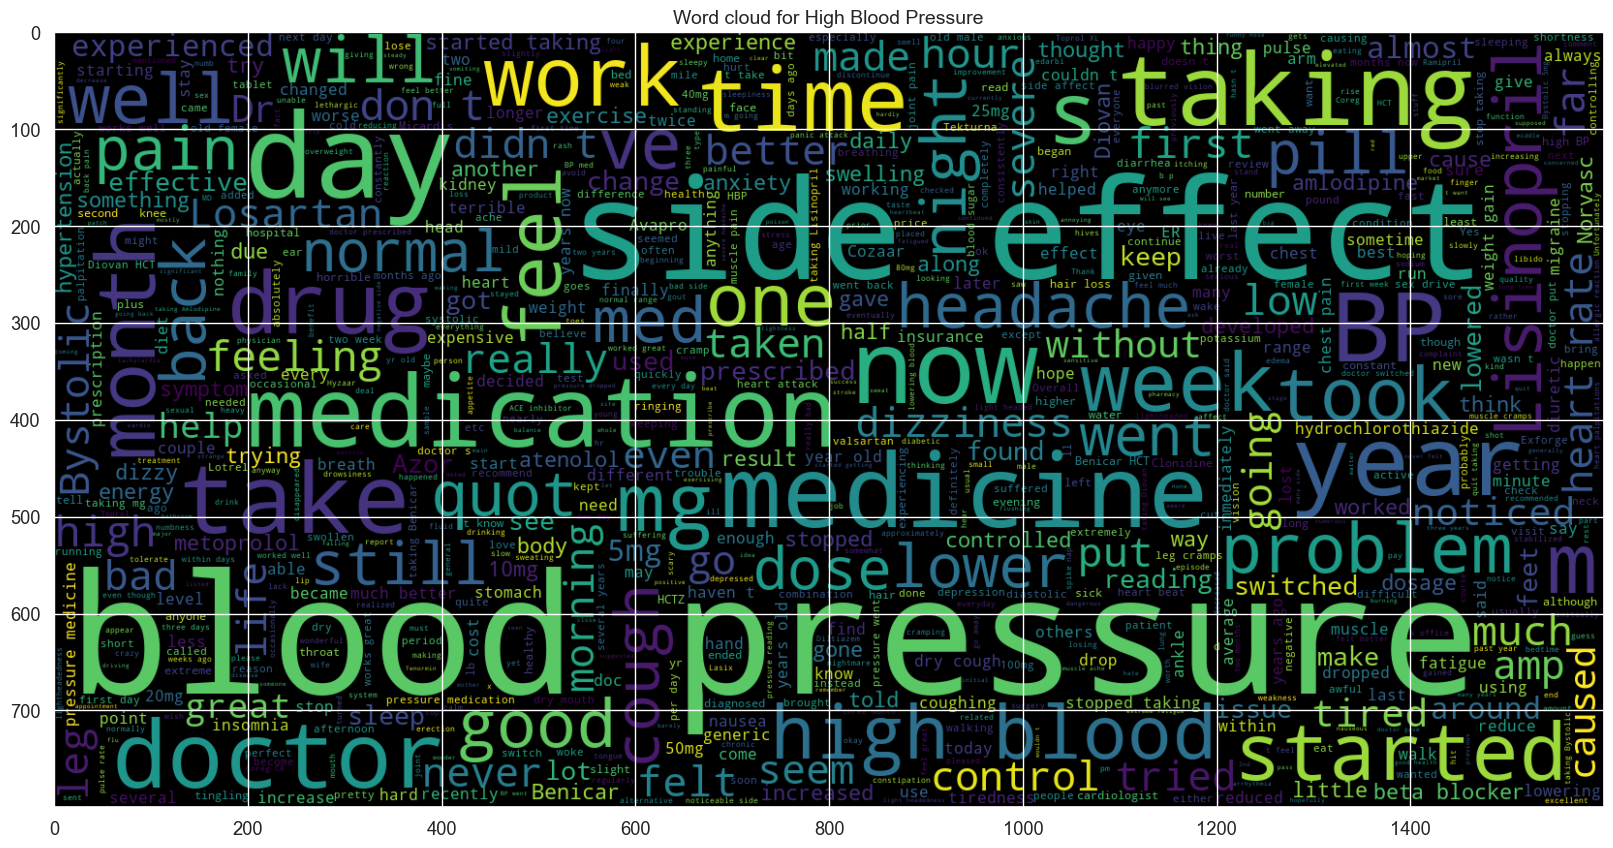

In [36]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 800, width = 1600, height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc,interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize = 14)

# data preprocessing

In [37]:
X['review'][50]  # review of diabtes type 2 

'"Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I was diagnosed as  stage 3 chronic kidney disease (CKD 3) so I am watching diet closely."'

In [38]:
X['review'][31] # review of depression

'"1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."'

In [39]:
X['review'][161251] # review of high blood pressure

'"It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why."'

In [40]:
for i, col in enumerate(X.columns):
    X.iloc[:,i] = X.iloc[:,i].str.replace('"','')

In [41]:
# to set the width of the column to maximum
#pd.set_option('max_colwidth',None)

In [42]:
X.head()

condition                                             review
11        Depression  I have taken anti-depressants for years, with ...
31        Depression  1 week on Zoloft for anxiety and mood swings. ...
44        Depression  my gp started me on Venlafaxine yesterday to h...
50  Diabetes, Type 2  Hey Guys,  It&#039;s been 4 months since my la...
67        Depression  This medicine saved my life. I was at my wits ...

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [45]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [48]:
nltk.download('omw-1.4')
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


sportingly
very
troubled


In [49]:
from bs4 import BeautifulSoup
import re

In [50]:
def review_to_words(raw_review):
    # delete html 
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    # make a space
    latters_only = re.sub('[^a-zA-Z]', ' ',review_text)
    # lower letters
    words = latters_only.lower().split()
    # stop words
    meaningful_words = [w for w in words if not w in stop]
    # lemmitization
    lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    #space join words
    return(' '.join(lemmatize_words))

In [51]:
X['review_clean']=X['review'].apply(review_to_words)

In [52]:
X.head()

condition                                             review  \
11        Depression  I have taken anti-depressants for years, with ...   
31        Depression  1 week on Zoloft for anxiety and mood swings. ...   
44        Depression  my gp started me on Venlafaxine yesterday to h...   
50  Diabetes, Type 2  Hey Guys,  It&#039;s been 4 months since my la...   
67        Depression  This medicine saved my life. I was at my wits ...   

                                         review_clean  
11  taken anti depressant year improvement mostly ...  
31  week zoloft anxiety mood swing take mg morning...  
44  gp started venlafaxine yesterday help depressi...  
50  hey guy month since last post wanted give mont...  
67  medicine saved life wit end anti depressant re...

# creating features and target variable

In [53]:
X_feat = X['review_clean']
y = X['condition']

In [54]:
# stratify the proportions of all categories are maintained in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2,random_state=0)

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# bag of words

In [56]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

# Nave bayes model

accuracy:   0.955
Confusion matrix, without normalization


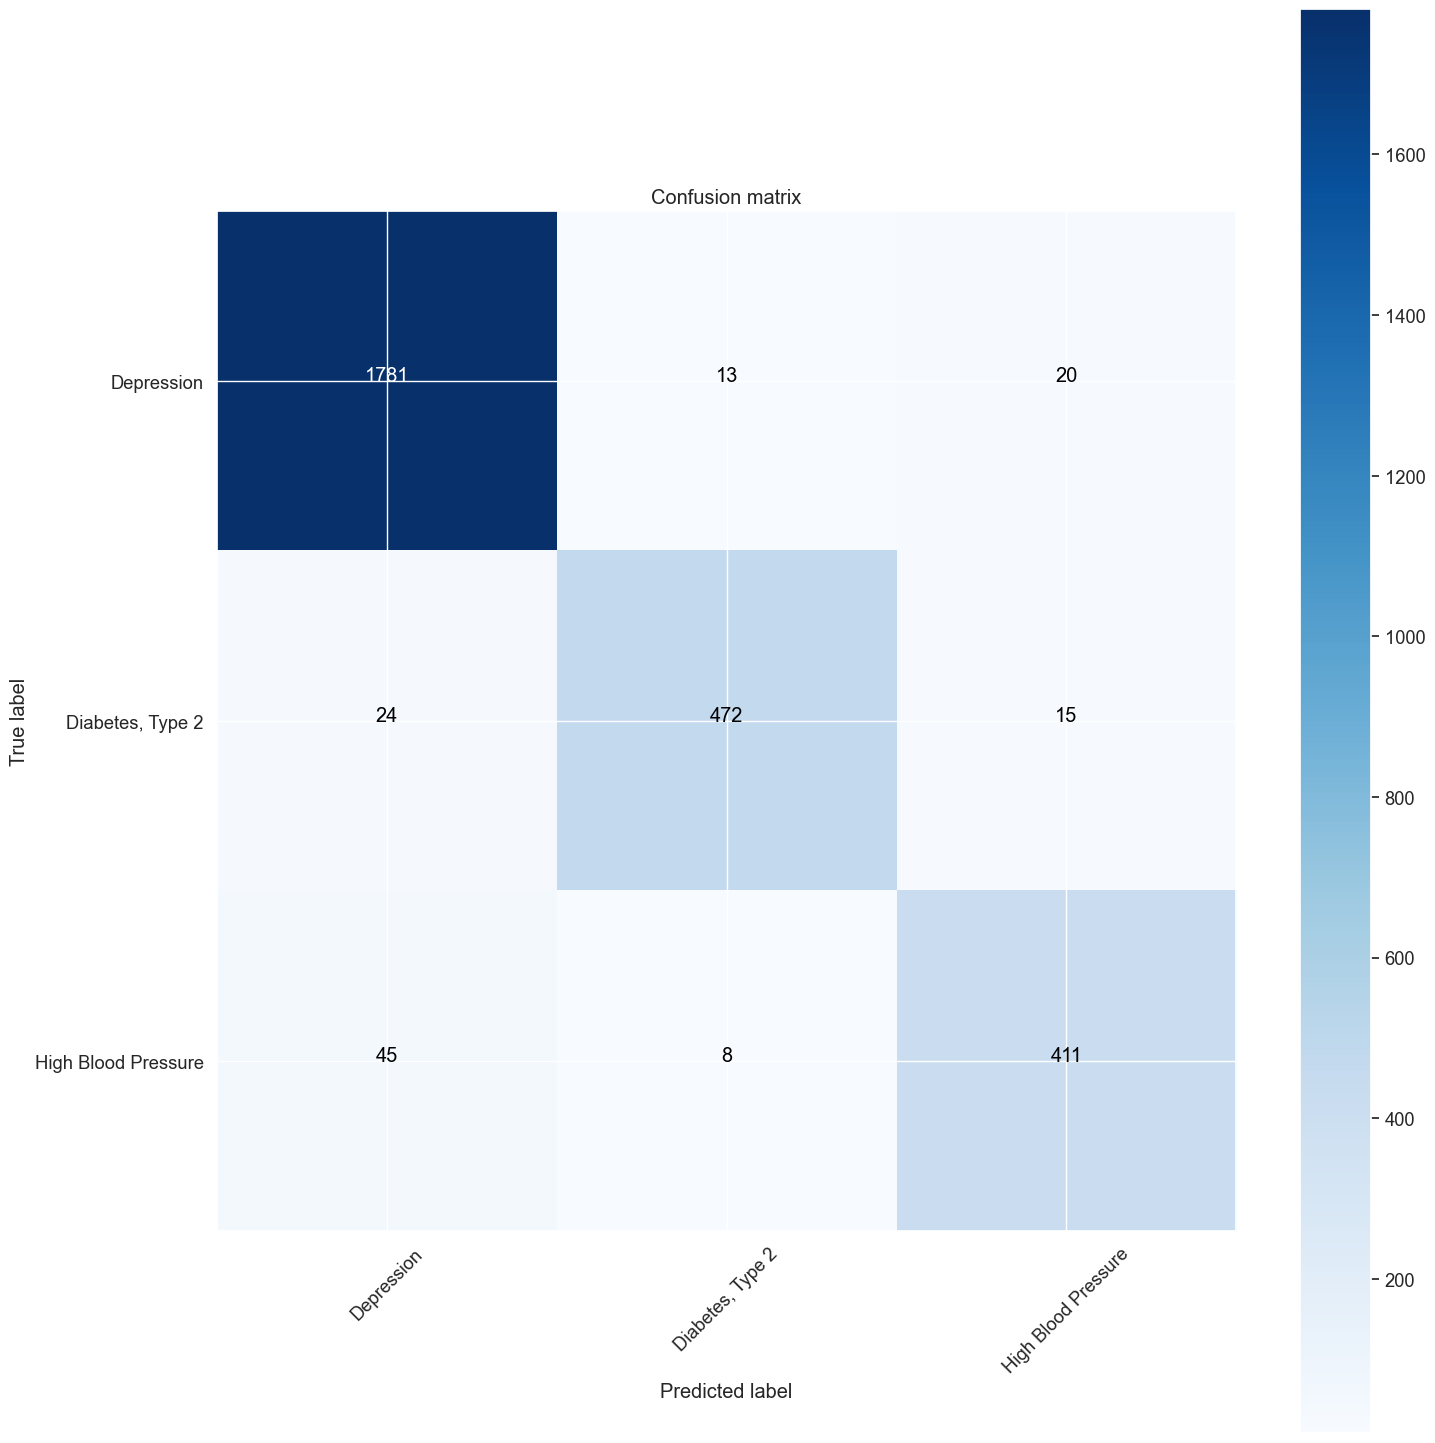

In [57]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])

# passive aggressive classifier model

In [1]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

NameError: name 'count_train' is not defined

# TFIDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

# Naves bayes model

accuracy:   0.896
Confusion matrix, without normalization


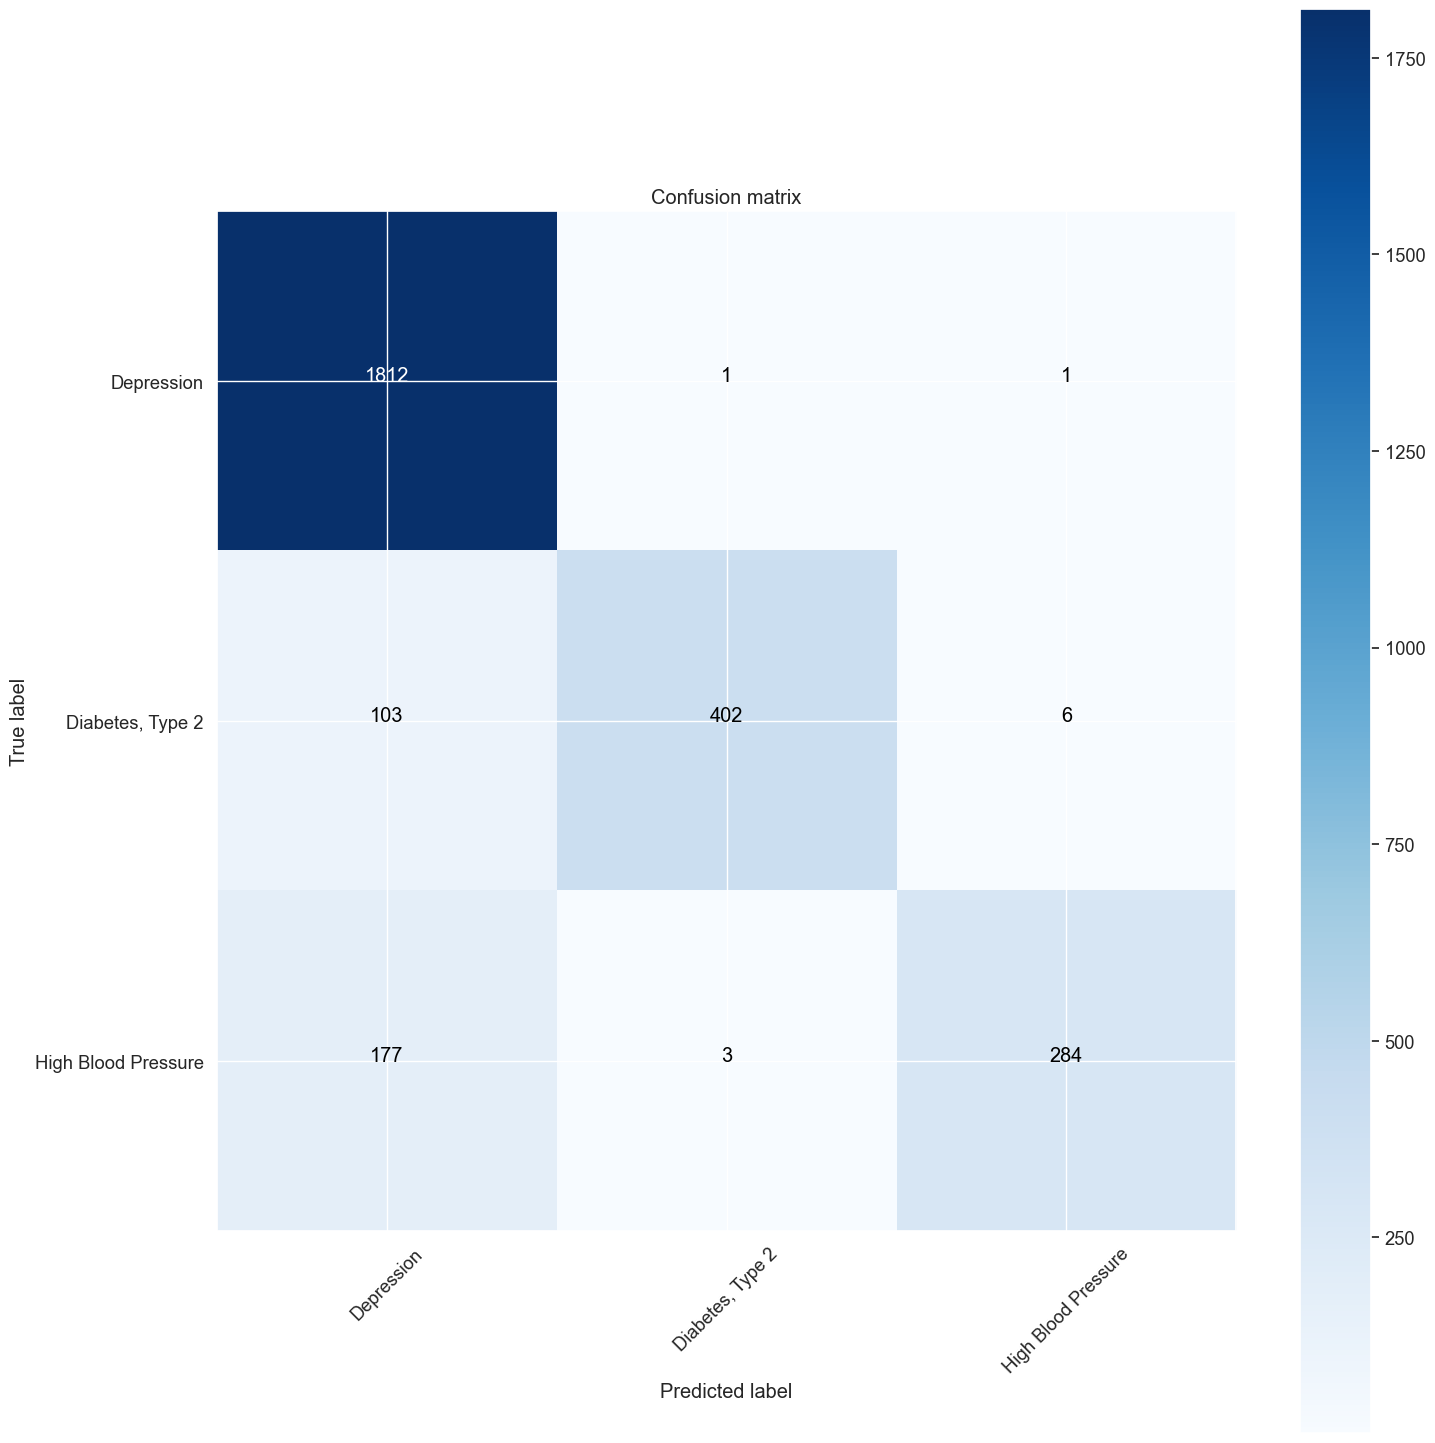

In [60]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# TFIDF model

accuracy:   0.961
Confusion matrix, without normalization


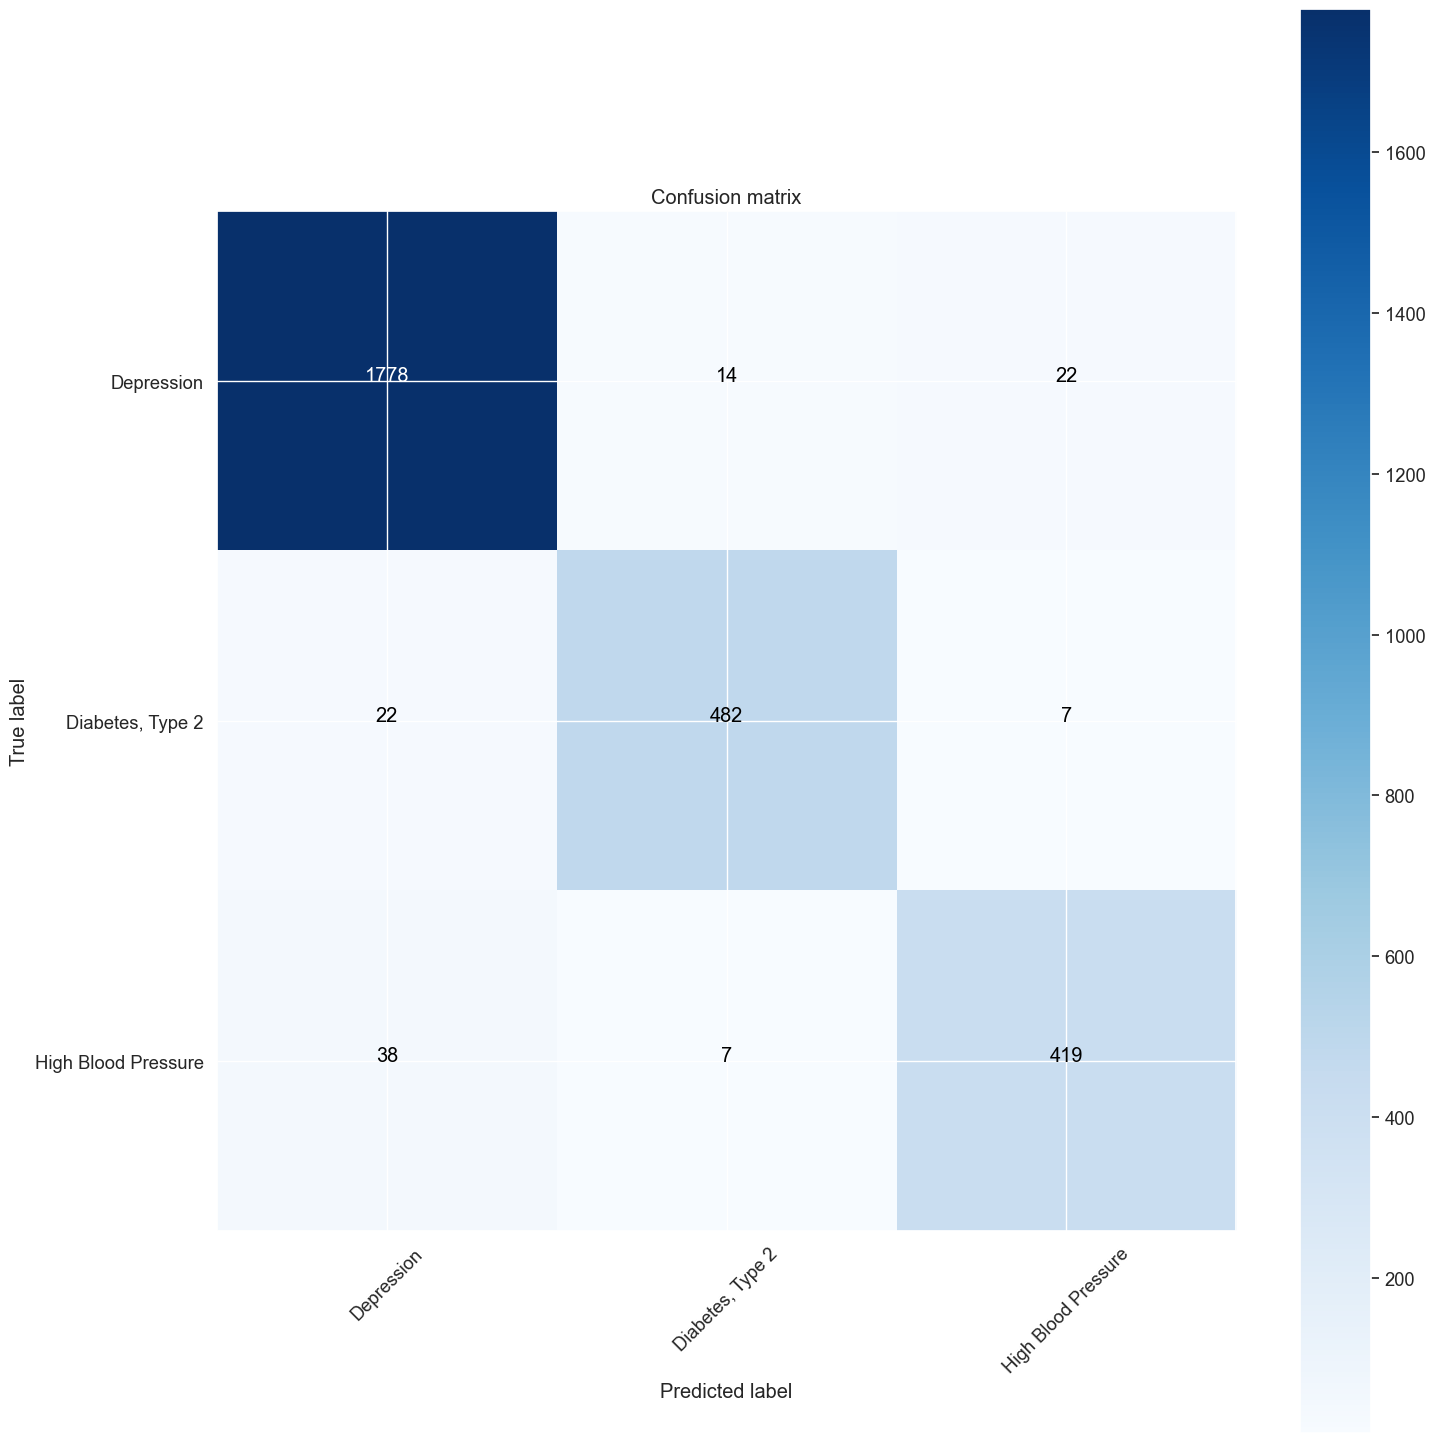

In [61]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])

# TFIDF BIGRAMS

In [62]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.967
Confusion matrix, without normalization


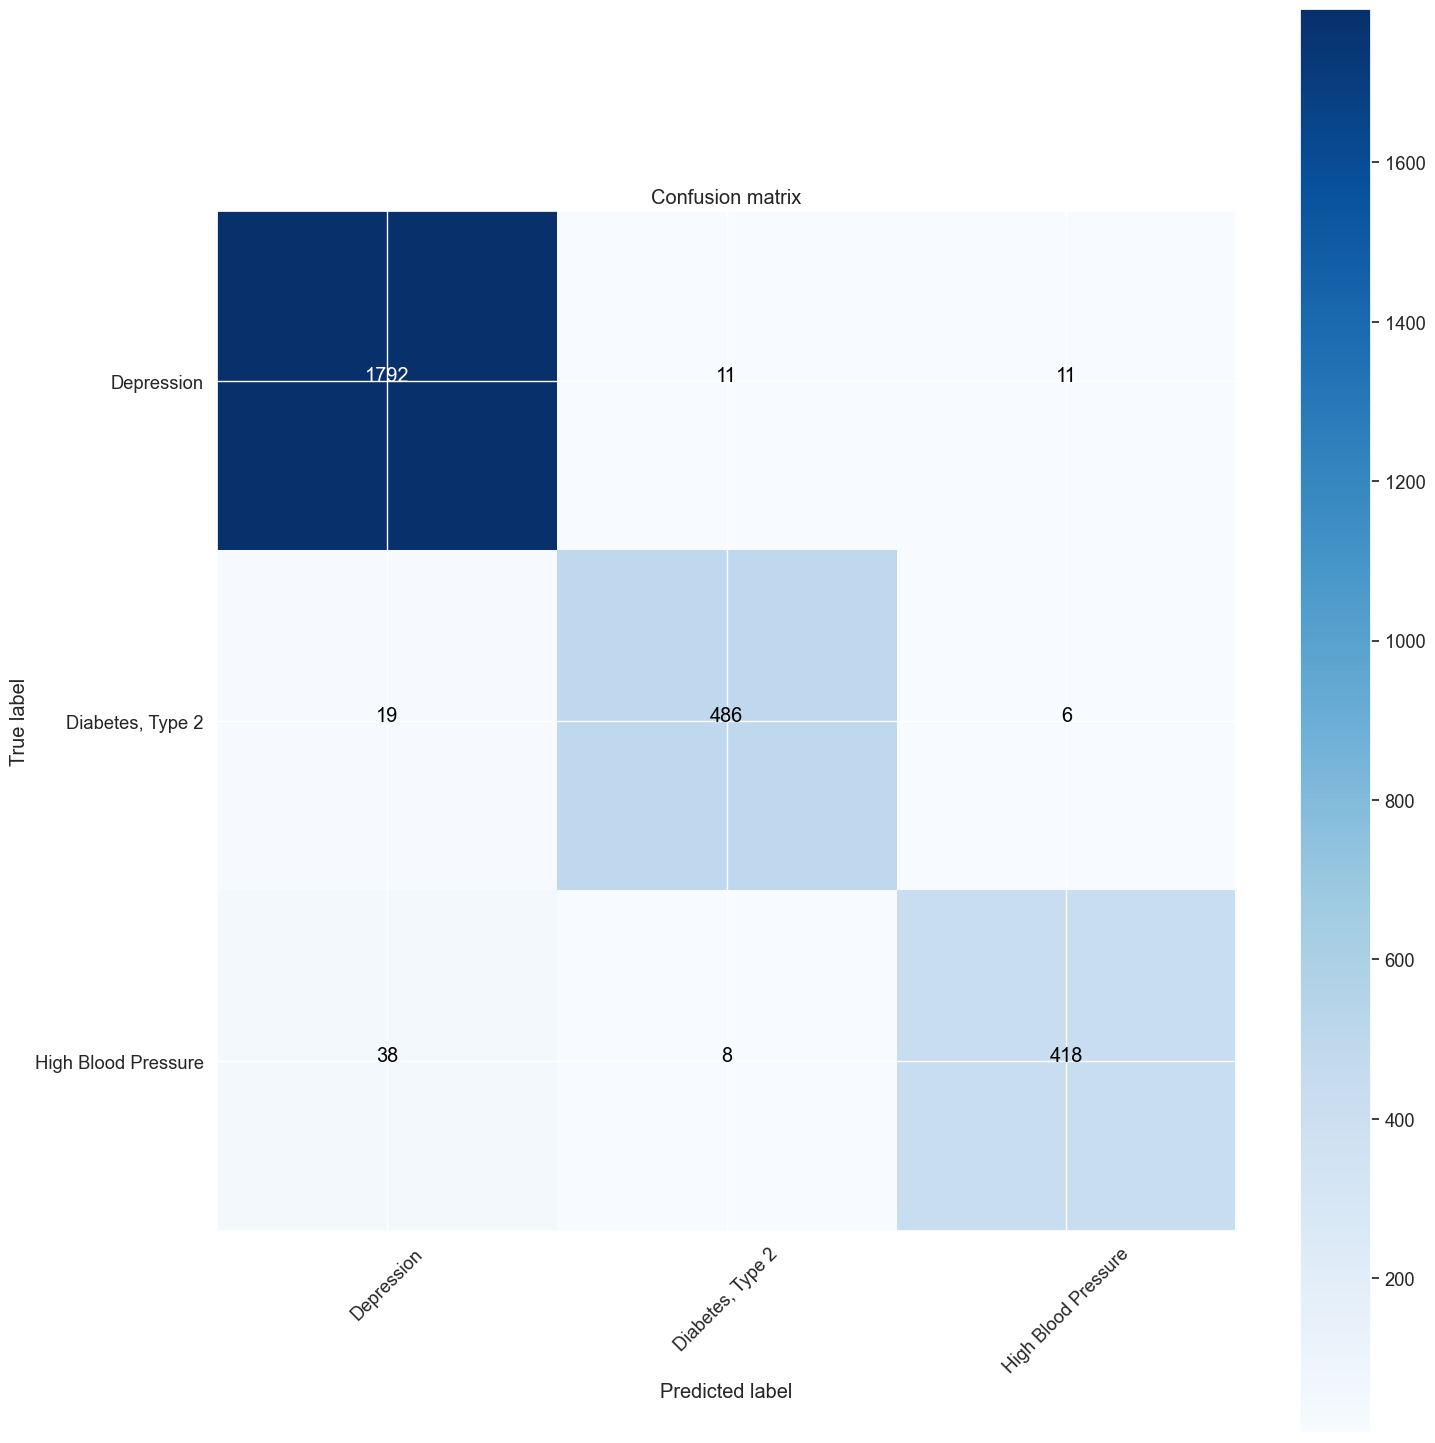

In [63]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])

# TFIDF TRIGRAMS

accuracy:   0.967
Confusion matrix, without normalization


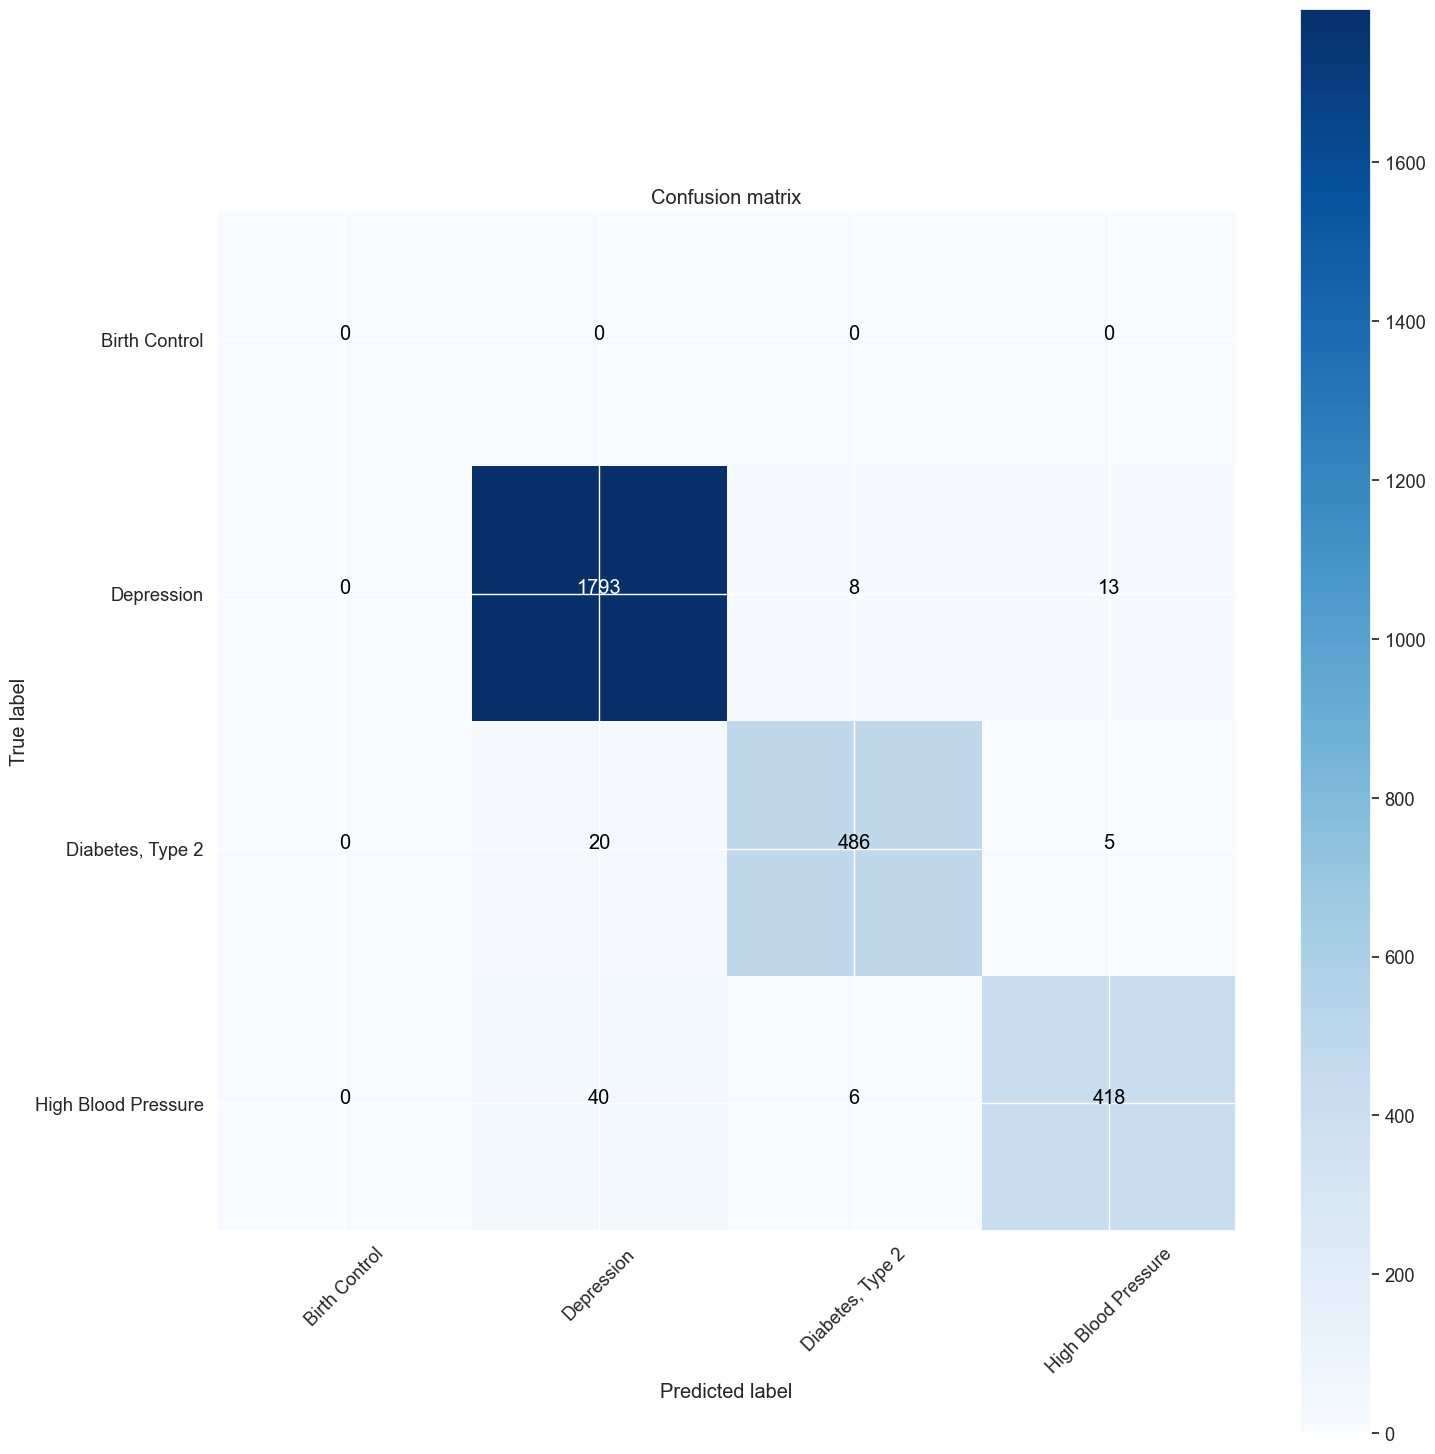

In [64]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# Most Important Features

In [1]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Depression')

NameError: name 'tfidf_vectorizer2' is not defined

In [66]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure suseptable 0.663647015987077
High Blood Pressure survivor 0.6641844352171404
High Blood Pressure wig 0.6715826156876267
High Blood Pressure surrounded 0.7256974583695068
High Blood Pressure syrinx 0.7387675082941446
High Blood Pressure externally 0.7835836072474418
High Blood Pressure spite 0.9015197437307242
High Blood Pressure defeating 0.9389791703139828
High Blood Pressure latuda 1.0173457125896437
High Blood Pressure unimportant 3.424088219619758


In [67]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 manically 0.5902313991171102
Diabetes, Type 2 accomplishment 0.5921305013480082
Diabetes, Type 2 speratic 0.6083667413595715
Diabetes, Type 2 tenderness 0.6414685282372248
Diabetes, Type 2 deteriorating 0.6625474230525519
Diabetes, Type 2 tender 0.6803879982852217
Diabetes, Type 2 driver 0.7408633893986013
Diabetes, Type 2 temp 1.529757121300816
Diabetes, Type 2 minded 1.959456825861729
Diabetes, Type 2 downward 2.6056230560259466


# sample predictions

In [68]:
X.tail()

condition  \
161251  High Blood Pressure   
161258  High Blood Pressure   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   

                                                   review  \
161251  It is fourth blood pressure pill for me. It fe...   
161258  While on Bystolic my feet and arms were numb. ...   
161278  I just got diagnosed with type 2. My doctor pr...   
161286  This is the third med I&#039;ve tried for anxi...   
161290  I have only been on Tekturna for 9 days. The e...   

                                             review_clean  
161251  fourth blood pressure pill feel like partly wo...  
161258  bystolic foot arm numb blood sugar became seve...  
161278  got diagnosed type doctor prescribed invokana ...  
161286  third med tried anxiety mild depression week h...  
161290  tekturna day effect immediate also calcium cha...

In [69]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [70]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [71]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [72]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)
    

predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losi

In [73]:
df_testsent = predict_text(sentences)
df_testsent

test_sent           prediction
0  tekturna day effect immediate also calcium cha...  High Blood Pressure
1  third med tried anxiety mild depression week h...           Depression
2  got diagnosed type doctor prescribed invokana ...     Diabetes, Type 2

In [74]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [75]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]))
test[0]

'High Blood Pressure'